In [2]:
#!/usr/bin/env python
"""learn xgboost"""

'learn xgboost'

In [3]:
TRAIN_FILE = "agaricus.txt.train"
TEST_FILE = "agaricus.txt.test"
FEATMAP_FILE = "featmap.txt"

In [4]:
# ipython core option  
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# featmap
import re
with open(FEATMAP_FILE) as fp:
    cols = []
    for line in fp:
        cols.append(re.search(r"\t(.*)\t", line).group(1))
print(len(cols))
cols

126


['cap-shape=bell',
 'cap-shape=conical',
 'cap-shape=convex',
 'cap-shape=flat',
 'cap-shape=knobbed',
 'cap-shape=sunken',
 'cap-surface=fibrous',
 'cap-surface=grooves',
 'cap-surface=scaly',
 'cap-surface=smooth',
 'cap-color=brown',
 'cap-color=buff',
 'cap-color=cinnamon',
 'cap-color=gray',
 'cap-color=green',
 'cap-color=pink',
 'cap-color=purple',
 'cap-color=red',
 'cap-color=white',
 'cap-color=yellow',
 'bruises?=bruises',
 'bruises?=no',
 'odor=almond',
 'odor=anise',
 'odor=creosote',
 'odor=fishy',
 'odor=foul',
 'odor=musty',
 'odor=none',
 'odor=pungent',
 'odor=spicy',
 'gill-attachment=attached',
 'gill-attachment=descending',
 'gill-attachment=free',
 'gill-attachment=notched',
 'gill-spacing=close',
 'gill-spacing=crowded',
 'gill-spacing=distant',
 'gill-size=broad',
 'gill-size=narrow',
 'gill-color=black',
 'gill-color=brown',
 'gill-color=buff',
 'gill-color=chocolate',
 'gill-color=gray',
 'gill-color=green',
 'gill-color=orange',
 'gill-color=pink',
 'gill-col

In [6]:
# load libsvm format file
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file(TRAIN_FILE, n_features=len(cols))
print(type(X))
print(type(X.todense()))
print(type(X.toarray()))
print(X.todense().shape)

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrix'>
<class 'numpy.ndarray'>
(6513, 126)


In [7]:
# dump libsvm format file
from sklearn.datasets import dump_svmlight_file
DUMP_LIBSVM_FILE = "agaricus.txt.train.dump"
dump_svmlight_file(X, y, DUMP_LIBSVM_FILE, zero_based=True)
!ls

agaricus.txt.test   agaricus.txt.train.dump  Untitled.ipynb
agaricus.txt.train  featmap.txt


In [8]:
# create dataframe
import pandas as pd
df = pd.DataFrame(X.toarray())
df.columns = cols
df["label"] = y
df.head()

,cap-shape=bell,cap-shape=conical,cap-shape=convex,cap-shape=flat,cap-shape=knobbed,cap-shape=sunken,cap-surface=fibrous,cap-surface=grooves,cap-surface=scaly,cap-surface=smooth,...,population=several,population=solitary,habitat=grasses,habitat=leaves,habitat=meadows,habitat=paths,habitat=urban,habitat=waste,habitat=woods,label
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# train
from sklearn.ensemble import GradientBoostingClassifier
param = {
    "loss": "deviance",
    "learning_rate": 0.3,
    "max_depth": 2,
    "subsample": 0.8,
    "n_estimators": 5
}
sk_gbt = GradientBoostingClassifier(**param)
sk_gbt.fit(df[cols], df["label"])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [10]:
# load libsvm format file
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file(TEST_FILE, n_features=len(cols))
print(type(X))
print(type(X.todense()))
print(type(X.toarray()))
print(X.todense().shape)

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrix'>
<class 'numpy.ndarray'>
(1611, 126)


In [11]:
# create dataframe
import pandas as pd
df = pd.DataFrame(X.toarray())
df.columns = cols
df["label"] = y
df.head()

,cap-shape=bell,cap-shape=conical,cap-shape=convex,cap-shape=flat,cap-shape=knobbed,cap-shape=sunken,cap-surface=fibrous,cap-surface=grooves,cap-surface=scaly,cap-surface=smooth,...,population=several,population=solitary,habitat=grasses,habitat=leaves,habitat=meadows,habitat=paths,habitat=urban,habitat=waste,habitat=woods,label
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
# test
y_pred = [x[1] for x in sk_gbt.predict_proba(df[cols])]
df["pred"] = y_pred
df.head()

,cap-shape=bell,cap-shape=conical,cap-shape=convex,cap-shape=flat,cap-shape=knobbed,cap-shape=sunken,cap-surface=fibrous,cap-surface=grooves,cap-surface=scaly,cap-surface=smooth,...,population=solitary,habitat=grasses,habitat=leaves,habitat=meadows,habitat=paths,habitat=urban,habitat=waste,habitat=woods,label,pred
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201426
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.770155
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201426
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201426
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.176288


In [13]:
# auc
def auc(y_true, y_pred):
    """
    calculate auc
    Args:
        y_true: label
        y_pred: predict
    Return:
        auc
    """
    l = [(i, t[0], t[1]) for i, t in enumerate(sorted(zip(y_true, y_pred), key=lambda x: x[1]))]
    # p = sum([x[1] for x in l])
    # n = len(l) - p
    # t = sum([x[0] for x in l if x[1] == 1])
    n, p, t = 0, 0, 0
    for i, y, r in l:
        if y == 0:
            n += 1
        else:
            p += 1
            t += i
    return (t-(p*(p+1)/2)) / (n*p)
from sklearn.metrics import roc_auc_score
y_true = df["label"].values
y_pred = df["pred"].values
print(roc_auc_score(y_true, y_pred))
print(auc(y_true, y_pred))

0.9990863633557627
0.9978887585653435


In [14]:
# load libsvm format file
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file(TRAIN_FILE, n_features=len(cols))
print(type(X))
print(type(X.todense()))
print(type(X.toarray()))
print(X.todense().shape)

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrix'>
<class 'numpy.ndarray'>
(6513, 126)


In [15]:
# create dataframe
import pandas as pd
df = pd.DataFrame(X.toarray())
df.columns = cols
df["label"] = y
df.head()

,cap-shape=bell,cap-shape=conical,cap-shape=convex,cap-shape=flat,cap-shape=knobbed,cap-shape=sunken,cap-surface=fibrous,cap-surface=grooves,cap-surface=scaly,cap-surface=smooth,...,population=several,population=solitary,habitat=grasses,habitat=leaves,habitat=meadows,habitat=paths,habitat=urban,habitat=waste,habitat=woods,label
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# train
import xgboost as xgb
param = {
    "objective": "binary:logistic",
    "learning_rate": 0.3,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "scale_pos_weight": 1,
    "n_estimators": 5,
}
sk_xgb = xgb.XGBClassifier(**param)
sk_xgb.fit(df[cols], df["label"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=5,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [17]:
# load libsvm format file
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file(TEST_FILE, n_features=len(cols))
print(type(X))
print(type(X.todense()))
print(type(X.toarray()))
print(X.todense().shape)

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrix'>
<class 'numpy.ndarray'>
(1611, 126)


In [18]:
# create dataframe
import pandas as pd
df = pd.DataFrame(X.toarray())
df.columns = cols
df["label"] = y
df.head()

,cap-shape=bell,cap-shape=conical,cap-shape=convex,cap-shape=flat,cap-shape=knobbed,cap-shape=sunken,cap-surface=fibrous,cap-surface=grooves,cap-surface=scaly,cap-surface=smooth,...,population=several,population=solitary,habitat=grasses,habitat=leaves,habitat=meadows,habitat=paths,habitat=urban,habitat=waste,habitat=woods,label
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
# test
y_pred = [x[1] for x in sk_gbt.predict_proba(df[cols])]
df["pred"] = y_pred
df.head()

,cap-shape=bell,cap-shape=conical,cap-shape=convex,cap-shape=flat,cap-shape=knobbed,cap-shape=sunken,cap-surface=fibrous,cap-surface=grooves,cap-surface=scaly,cap-surface=smooth,...,population=solitary,habitat=grasses,habitat=leaves,habitat=meadows,habitat=paths,habitat=urban,habitat=waste,habitat=woods,label,pred
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201426
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.770155
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201426
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201426
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.176288


In [20]:
# auc
def auc(y_true, y_pred):
    """
    calculate auc
    Args:
        y_true: label
        y_pred: predict
    Return:
        auc
    """
    l = [(i, t[0], t[1]) for i, t in enumerate(sorted(zip(y_true, y_pred), key=lambda x: x[1]))]
    # p = sum([x[1] for x in l])
    # n = len(l) - p
    # t = sum([x[0] for x in l if x[1] == 1])
    n, p, t = 0, 0, 0
    for i, y, r in l:
        if y == 0:
            n += 1
        else:
            p += 1
            t += i
    return (t-(p*(p+1)/2)) / (n*p)
from sklearn.metrics import roc_auc_score
y_true = df["label"].values
y_pred = df["pred"].values
print(roc_auc_score(y_true, y_pred))
print(auc(y_true, y_pred))

0.9990863633557627
0.9978887585653435


In [21]:
# load libsvm format file
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file(TRAIN_FILE, n_features=len(cols))
print(type(X))
print(type(X.todense()))
print(type(X.toarray()))
print(X.todense().shape)

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrix'>
<class 'numpy.ndarray'>
(6513, 126)


In [22]:
# create dataframe
import pandas as pd
df = pd.DataFrame(X.toarray())
df.columns = cols
df["label"] = y
df.head()

,cap-shape=bell,cap-shape=conical,cap-shape=convex,cap-shape=flat,cap-shape=knobbed,cap-shape=sunken,cap-surface=fibrous,cap-surface=grooves,cap-surface=scaly,cap-surface=smooth,...,population=several,population=solitary,habitat=grasses,habitat=leaves,habitat=meadows,habitat=paths,habitat=urban,habitat=waste,habitat=woods,label
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# train
param = {
        "objective": "binary:logistic",
        "eta": 0.3,
        "max_depth": 4,
        "min_child_weight": 1,
        "gamma": 0,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "scale_pos_weight": 1,
        "silent": True
    }
num_boost_round = 5
dtrain = xgb.DMatrix(df[cols], label=df["label"])
bst_xgb = xgb.train(param, dtrain, num_boost_round=num_boost_round)

In [24]:
# load libsvm format file
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file(TEST_FILE, n_features=len(cols))
print(type(X))
print(type(X.todense()))
print(type(X.toarray()))
print(X.todense().shape)

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrix'>
<class 'numpy.ndarray'>
(1611, 126)


In [25]:
# create dataframe
import pandas as pd
df = pd.DataFrame(X.toarray())
df.columns = cols
df["label"] = y
df.head()

,cap-shape=bell,cap-shape=conical,cap-shape=convex,cap-shape=flat,cap-shape=knobbed,cap-shape=sunken,cap-surface=fibrous,cap-surface=grooves,cap-surface=scaly,cap-surface=smooth,...,population=several,population=solitary,habitat=grasses,habitat=leaves,habitat=meadows,habitat=paths,habitat=urban,habitat=waste,habitat=woods,label
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
dtest = xgb.DMatrix(df[cols], label=df["label"])
p_pred = bst_xgb.predict(dtest)
df["pred"] = p_pred
df.head()

,cap-shape=bell,cap-shape=conical,cap-shape=convex,cap-shape=flat,cap-shape=knobbed,cap-shape=sunken,cap-surface=fibrous,cap-surface=grooves,cap-surface=scaly,cap-surface=smooth,...,population=solitary,habitat=grasses,habitat=leaves,habitat=meadows,habitat=paths,habitat=urban,habitat=waste,habitat=woods,label,pred
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.097829
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.890670
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.097829
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.097829
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.116021


In [27]:
# auc
def auc(y_true, y_pred):
    """
    calculate auc
    Args:
        y_true: label
        y_pred: predict
    Return:
        auc
    """
    l = [(i, t[0], t[1]) for i, t in enumerate(sorted(zip(y_true, y_pred), key=lambda x: x[1]))]
    # p = sum([x[1] for x in l])
    # n = len(l) - p
    # t = sum([x[0] for x in l if x[1] == 1])
    n, p, t = 0, 0, 0
    for i, y, r in l:
        if y == 0:
            n += 1
        else:
            p += 1
            t += i
    return (t-(p*(p+1)/2)) / (n*p)
from sklearn.metrics import roc_auc_score
y_true = df["label"].values
y_pred = df["pred"].values
print(roc_auc_score(y_true, y_pred))
print(auc(y_true, y_pred))

1.0
0.9988023952095808


In [28]:
# train
param = {
        "objective": "binary:logistic",
        "eta": 0.3,
        "max_depth": 4,
        "min_child_weight": 1,
        "gamma": 0,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "scale_pos_weight": 1,
        "silent": True
    }
num_boost_round = 5
dtrain = xgb.DMatrix(TRAIN_FILE)
bst = xgb.train(param, dtrain, num_boost_round=num_boost_round)

[14:57:48] 6513x127 matrix with 143286 entries loaded from agaricus.txt.train


In [29]:
dtest = xgb.DMatrix(TEST_FILE)
print(dtest.num_row())
print(dtest.num_col())
print(dtest.feature_names)

[14:57:48] 1611x127 matrix with 35442 entries loaded from agaricus.txt.test
1611
127
['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126']


In [33]:
# get_dump maybe dislocation problem
bst.get_dump()
bst.get_dump(FEATMAP_FILE)

['0:[f29<-9.53674316e-07] yes=1,no=2,missing=1\n\t1:[f56<-9.53674316e-07] yes=3,no=4,missing=3\n\t\t3:[f60<-9.53674316e-07] yes=7,no=8,missing=7\n\t\t\t7:[f23<-9.53674316e-07] yes=13,no=14,missing=13\n\t\t\t\t13:leaf=0.587005436\n\t\t\t\t14:leaf=-0.533333361\n\t\t\t8:leaf=-0.581395388\n\t\t4:[f21<-9.53674316e-07] yes=9,no=10,missing=9\n\t\t\t9:leaf=0.517241418\n\t\t\t10:leaf=-0.593063593\n\t2:[f109<-9.53674316e-07] yes=5,no=6,missing=5\n\t\t5:[f67<-9.53674316e-07] yes=11,no=12,missing=11\n\t\t\t11:leaf=-0.596139729\n\t\t\t12:[f39<-9.53674316e-07] yes=15,no=16,missing=15\n\t\t\t\t15:leaf=0.517241418\n\t\t\t\t16:leaf=-0.41538465\n\t\t6:leaf=0.548936188\n',
 '0:[f29<-9.53674316e-07] yes=1,no=2,missing=1\n\t1:[f21<-9.53674316e-07] yes=3,no=4,missing=3\n\t\t3:leaf=0.46597743\n\t\t4:[f27<-9.53674316e-07] yes=7,no=8,missing=7\n\t\t\t7:[f30<-9.53674316e-07] yes=11,no=12,missing=11\n\t\t\t\t11:leaf=-0.484129578\n\t\t\t\t12:leaf=0.45442912\n\t\t\t8:leaf=0.455947399\n\t2:[f109<-9.53674316e-07] ye

['0:[odor=pungent] yes=2,no=1\n\t1:[stalk-root=cup] yes=4,no=3\n\t\t3:[stalk-root=missing] yes=8,no=7\n\t\t\t7:[odor=anise] yes=14,no=13\n\t\t\t\t13:leaf=0.587005436\n\t\t\t\t14:leaf=-0.533333361\n\t\t\t8:leaf=-0.581395388\n\t\t4:[bruises?=no] yes=10,no=9\n\t\t\t9:leaf=0.517241418\n\t\t\t10:leaf=-0.593063593\n\t2:[spore-print-color=orange] yes=6,no=5\n\t\t5:[stalk-surface-below-ring=silky] yes=12,no=11\n\t\t\t11:leaf=-0.596139729\n\t\t\t12:[gill-size=narrow] yes=16,no=15\n\t\t\t\t15:leaf=0.517241418\n\t\t\t\t16:leaf=-0.41538465\n\t\t6:leaf=0.548936188\n',
 '0:[odor=pungent] yes=2,no=1\n\t1:[bruises?=no] yes=4,no=3\n\t\t3:leaf=0.46597743\n\t\t4:[odor=musty] yes=8,no=7\n\t\t\t7:[odor=spicy] yes=12,no=11\n\t\t\t\t11:leaf=-0.484129578\n\t\t\t\t12:leaf=0.45442912\n\t\t\t8:leaf=0.455947399\n\t2:[spore-print-color=orange] yes=6,no=5\n\t\t5:[stalk-surface-below-ring=silky] yes=10,no=9\n\t\t\t9:leaf=-0.46083796\n\t\t\t10:[gill-color=black] yes=14,no=13\n\t\t\t\t13:leaf=-0.351340026\n\t\t\t\t14:

In [36]:
# get_score maybe dislocation problem
bst.get_score()
bst.get_score(FEATMAP_FILE)

{'f29': 5,
 'f56': 1,
 'f60': 1,
 'f23': 1,
 'f21': 4,
 'f109': 5,
 'f67': 5,
 'f39': 3,
 'f27': 4,
 'f30': 3,
 'f40': 5,
 'f58': 1,
 'f22': 1}

{'odor=pungent': 5,
 'stalk-root=cup': 1,
 'stalk-root=missing': 1,
 'odor=anise': 1,
 'bruises?=no': 4,
 'spore-print-color=orange': 5,
 'stalk-surface-below-ring=silky': 5,
 'gill-size=narrow': 3,
 'odor=musty': 4,
 'odor=spicy': 3,
 'gill-color=black': 5,
 'stalk-root=rhizomorphs': 1,
 'odor=almond': 1}

In [38]:
p_pred = bst.predict(dtest)
p_pred

array([0.0979647 , 0.8933177 , 0.0979647 , ..., 0.8977595 , 0.10197935,
       0.8977595 ], dtype=float32)

In [39]:
# auc
def auc(y_true, y_pred):
    """
    calculate auc
    Args:
        y_true: label
        y_pred: predict
    Return:
        auc
    """
    l = [(i, t[0], t[1]) for i, t in enumerate(sorted(zip(y_true, y_pred), key=lambda x: x[1]))]
    # p = sum([x[1] for x in l])
    # n = len(l) - p
    # t = sum([x[0] for x in l if x[1] == 1])
    n, p, t = 0, 0, 0
    for i, y, r in l:
        if y == 0:
            n += 1
        else:
            p += 1
            t += i
    return (t-(p*(p+1)/2)) / (n*p)
from sklearn.metrics import roc_auc_score
y_true = df["label"].values
y_pred = df["pred"].values
print(roc_auc_score(y_true, y_pred))
print(auc(y_true, y_pred))

1.0
0.9988023952095808


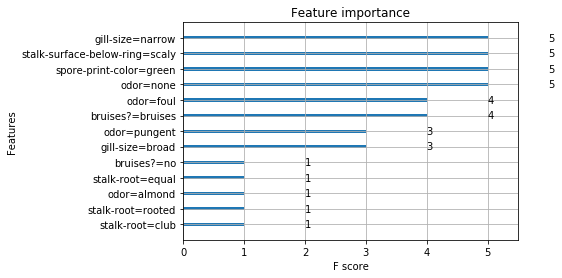

In [45]:
%matplotlib inline
bst.feature_names = ["repair"]+cols
xgb.plot_importance(bst)

In [47]:
# save_model
MODEL_FILE = "bst.model"
bst.save_model(MODEL_FILE)

In [48]:
!jupyter nbconvert --to python learn-xgboost.ipynb

[NbConvertApp] Converting notebook learn-xgboost.ipynb to python
[NbConvertApp] Writing 8055 bytes to learn-xgboost.py


In [49]:
!jupyter nbconvert --to html learn-xgboost.ipynb

[NbConvertApp] Converting notebook learn-xgboost.ipynb to html
[NbConvertApp] Writing 477117 bytes to learn-xgboost.html


In [50]:
# !jupyter nbconvert --to pdf learn-shap.ipynb

In [51]:
!ls

agaricus.txt.test	 bst.model	     learn-xgboost.ipynb
agaricus.txt.train	 featmap.txt	     learn-xgboost.py
agaricus.txt.train.dump  learn-xgboost.html
